# Exploratory Data Analysis with NLP Tools

In [1]:
#!pip install pandas-profiling

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os
import nltk
from nltk.corpus import stopwords
from collections import Counter
import pandas_profiling
import warnings
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import string
import datetime as dt
from datetime import datetime, timedelta

warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('bmh')

In [3]:
nltk.download()
string.punctuation

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [4]:
# Set path to cryptocurrency csv files
path = '../Data/Reddit_Comments/Bitcoin/'

files = os.listdir(path)

# Create list of csv file names
csv_list = []
for f in files:
    csv_list.append(f)

In [5]:
csv_list = csv_list[:-1]
csv_list

['Bitcoin_2018-12-31.csv',
 'Bitcoin_2019-01-01.csv',
 'Bitcoin_2019-01-02.csv',
 'Bitcoin_2019-01-03.csv',
 'Bitcoin_2019-01-04.csv',
 'Bitcoin_2019-01-05.csv',
 'Bitcoin_2019-01-06.csv',
 'Bitcoin_2019-01-07.csv',
 'Bitcoin_2019-01-08.csv',
 'Bitcoin_2019-01-09.csv',
 'Bitcoin_2019-01-10.csv',
 'Bitcoin_2019-01-11.csv',
 'Bitcoin_2019-01-12.csv',
 'Bitcoin_2019-01-13.csv',
 'Bitcoin_2019-01-14.csv',
 'Bitcoin_2019-01-15.csv',
 'Bitcoin_2019-01-16.csv',
 'Bitcoin_2019-01-17.csv',
 'Bitcoin_2019-01-18.csv',
 'Bitcoin_2019-01-19.csv',
 'Bitcoin_2019-01-20.csv',
 'Bitcoin_2019-01-21.csv',
 'Bitcoin_2019-01-22.csv',
 'Bitcoin_2019-01-23.csv',
 'Bitcoin_2019-01-24.csv',
 'Bitcoin_2019-01-25.csv',
 'Bitcoin_2019-01-26.csv',
 'Bitcoin_2019-01-27.csv',
 'Bitcoin_2019-01-28.csv',
 'Bitcoin_2019-01-29.csv',
 'Bitcoin_2019-01-30.csv',
 'Bitcoin_2019-01-31.csv',
 'Bitcoin_2019-02-01.csv',
 'Bitcoin_2019-02-02.csv',
 'Bitcoin_2019-02-03.csv',
 'Bitcoin_2019-02-04.csv',
 'Bitcoin_2019-02-05.csv',
 

In [6]:
csv_list[0]

'Bitcoin_2018-12-31.csv'

## Read csv file

In [7]:
#df = pd.read_csv(path + csv_list[0])
#df.head()

In [8]:
df = pd.read_csv('../Data/Reddit_Comments/master_bitcoin_comments.csv')
df.head()

,author,created_utc,body
0,BobyCrypto,1546248072,Start earning LN tips with good research and p...
1,rBitcoinMod,1546248007,This topic has been submitted several times. P...
2,ishristov,1546247936,I don't think so. We'd need something else ent...
3,thermobear,1546247892,I’ve seen multiple people call Peterson a hack...
4,anonredditorrbitcoin,1546247713,i think so


In [9]:
df.shape

(1607346, 3)

In [10]:
df.describe()

,created_utc
count,1.607346e+06
mean,1.559907e+09
std,7.261601e+06
min,1.546240e+09
25%,1.554271e+09
50%,1.560784e+09
75%,1.565372e+09
max,1.572937e+09


In [11]:
df.dtypes

author         object
created_utc     int64
body           object
dtype: object

## Data Cleaning

In [12]:
# Identify number of duplicate rows
duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (803718, 3)


In [13]:
# Remove all rows that have NaN in df['body']
df = df[df['body'].notna()]

In [14]:
df = df[df.author != "AutoModerator"]

In [15]:
# remove all comments from Automoderator
df = df[df.author != "rBitcoinMod"]

In [16]:
# remove all comments with deleted in body
df = df[df.body != "deleted"]

In [17]:
# remove all comments with deleted in body
df = df[df.body != "removed"]

In [18]:
# remove all comments with www.reddit.com in body
df = df[df["body"].str.contains("www.reddit.com")==False]

In [19]:
# Remove all non alphanumeric characters
df['body'] = df['body'].replace('[^a-zA-Z ]', '', regex=True)

In [20]:
# remove all comments with lntip in body
df = df[df.body != "lntip"]

In [21]:
# Convert body column to lowercase
df['body'] = df['body'].str.lower()

In [22]:
df.head()

,author,created_utc,body
0,BobyCrypto,1546248072,start earning ln tips with good research and p...
2,ishristov,1546247936,i dont think so wed need something else entire...
3,thermobear,1546247892,ive seen multiple people call peterson a hack ...
4,anonredditorrbitcoin,1546247713,i think so
5,anonredditorrbitcoin,1546247692,its a techniqe closely related to btc for mixi...


## Pandas Profiling Report

In [23]:
# Pandas profile report for profile analysis of top datset
profile = pandas_profiling.ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Analyzing Text Statistics

In [24]:
# Word Number Histogram
def word_number_hist(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

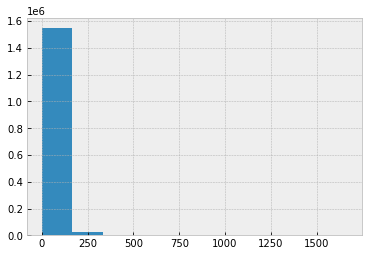

In [25]:
word_number_hist(df['body'])

In [26]:
# Average word length histogram for each sentence
def word_length_hist(text):
    text.str.split().\
        apply(lambda x : [len(i) for i in x]). \
        map(lambda x: np.mean(x)).\
        hist()

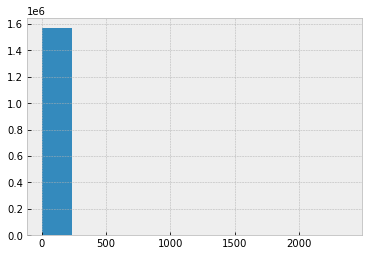

In [27]:
word_length_hist(df['body'])

## NLTK

In [28]:
nltk.download('stopwords')
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
# Plot Top Stopwords Barchart
def top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

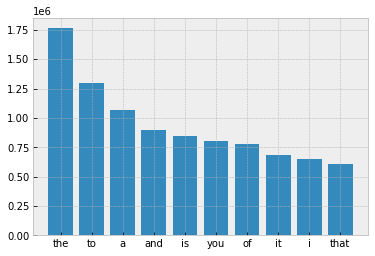

In [30]:
top_stopwords_barchart(df['body'])

In [31]:
# Top Non-Stopwords Barchart
def top_words_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

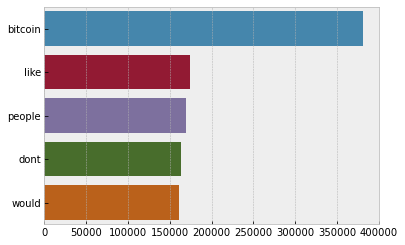

In [32]:
top_words_barchart(df['body'])

## Ngram Exploration

In [33]:
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter
from nltk.util import ngrams

def top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

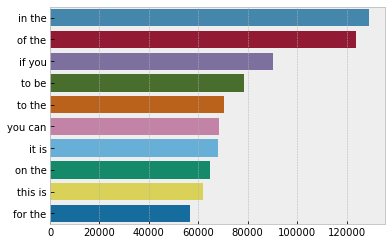

In [34]:
top_ngrams_barchart(df['body'],2)

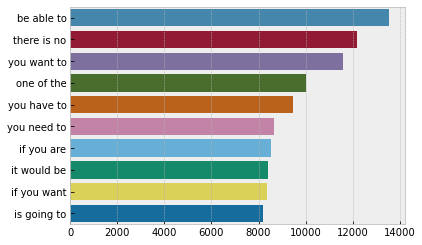

In [35]:
top_ngrams_barchart(df['body'],3)

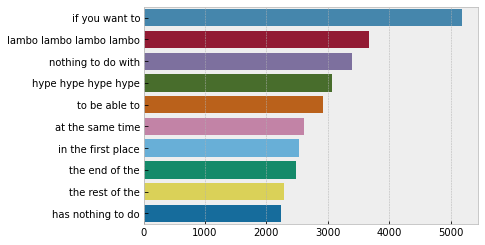

In [36]:
top_ngrams_barchart(df['body'],4)

## Topic Modeling Exploration with pyLDAvis

In [37]:
import numpy as np
import nltk
from nltk.corpus import stopwords
import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis
import pyLDAvis.gensim_models

nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [38]:
def get_lda_objects(text):
    nltk.download('stopwords')    
    stop=set(stopwords.words('english'))

    
    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
    lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
    
    return lda_model, bow_corpus, dic

def lda_vis(lda_model, bow_corpus, dic):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dic)
    return vis

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
df2 = df

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
lda_model, bow_corpus, dic = get_lda_objects(df2['body'])

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
lda_model.show_topics()

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.018*"wallet" + 0.016*"bitcoin" + 0.013*"use" + 0.012*"transaction" + 0.009*"fee" + 0.008*"exchange" + 0.008*"address" + 0.008*"key" + 0.007*"would" + 0.007*"using"'),
 (1,
  '0.023*"bitcoin" + 0.019*"btc" + 0.017*"price" + 0.015*"buy" + 0.014*"year" + 0.014*"time" + 0.009*"market" + 0.009*"would" + 0.008*"day" + 0.007*"sell"'),
 (2,
  '0.014*"like" + 0.013*"dont" + 0.011*"know" + 0.010*"bitcoin" + 0.009*"people" + 0.008*"good" + 0.008*"youre" + 0.007*"one" + 0.007*"get" + 0.007*"thats"'),
 (3,
  '0.020*"bitcoin" + 0.016*"money" + 0.013*"people" + 0.008*"would" + 0.008*"bank" + 0.008*"currency" + 0.007*"value" + 0.007*"gold" + 0.006*"like" + 0.006*"dont"')]

In [42]:
lda_vis(lda_model, bow_corpus, dic)

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.050110 -0.023331       1        1  29.279897
0      0.186979  0.108106       2        1  24.475302
1     -0.024659 -0.197332       3        1  23.891012
2     -0.212429  0.112557       4        1  22.353789, topic_info=            Term           Freq          Total Category  logprob  loglift
84        wallet  100016.000000  100016.000000  Default  30.0000  30.0000
197        price   92214.000000   92214.000000  Default  29.0000  29.0000
54           btc  130949.000000  130949.000000  Default  28.0000  28.0000
303         year   84864.000000   84864.000000  Default  27.0000  27.0000
991  transaction   70641.000000   70641.000000  Default  26.0000  26.0000
..           ...            ...            ...      ...      ...      ...
208        thing   23979.825798   75247.898758   Topic4  -5.3807   0.3546
558         well   22070.734136   59178.207587   Topic4  -5.4636   0.5119
58          make   23965.450612   99313.427938   Topic4  -5.3813   0.0765
146         time   20940.880387  123229.840191   Topic4  -5.5162  -0.2742
188         even   19867.015417   87334.472229   Topic4  -5.5688   0.0175

[269 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
745       1  0.210196  account
745       2  0.789799  account
429       2  0.999976  address
390       3  0.999923      ago
105       1  0.308947     also
...     ...       ...      ...
303       3  0.924312     year
836       1  0.138986    youre
836       2  0.120967    youre
836       3  0.181280    youre
836       4  0.558779    youre

[381 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 2, 3])

## Wordcloud

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


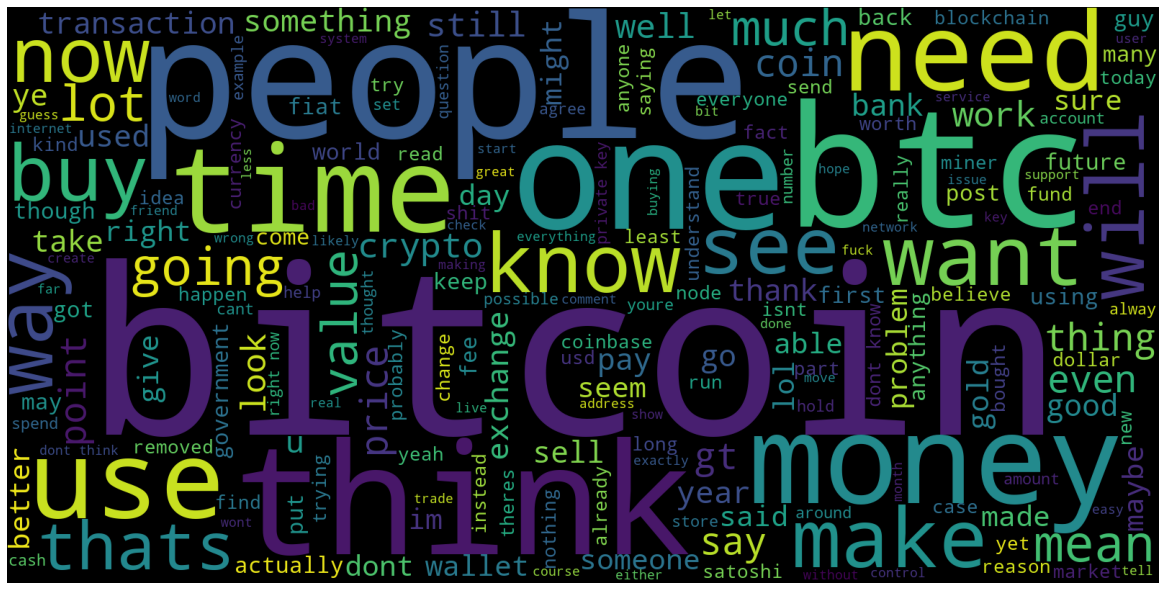

In [43]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for x in df2.body:
     
    # typecaste each val to string
    x = str(x)
 
    # split the value
    tokens = x.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1600, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (16, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Sentiment Analysis

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

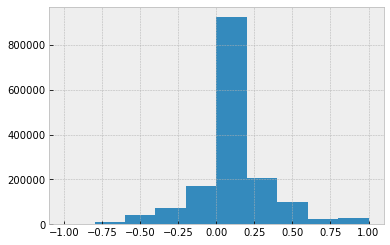

In [44]:
from textblob import TextBlob

# Polarity Histogram
def polarity(text):
    return TextBlob(text).sentiment.polarity

df2['polarity_score']=df2['body'].\
   apply(lambda x : polarity(x))
df2['polarity_score'].hist()

Majority of comments are neutral

## Sentiment Barchart

In [45]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def sentiment_vader(text, sid):
    ss = sid.polarity_scores(text)
    ss.pop('compound')
    return max(ss, key=ss.get)

def sentiment_textblob(text):
        x = TextBlob(text).sentiment.polarity
        
        if x<0:
            return 'neg'
        elif x==0:
            return 'neu'
        else:
            return 'pos'

def sentiment_barchart(text, method='TextBlob'):
    if method == 'TextBlob':
        sentiment = text.map(lambda x: sentiment_textblob(x))
    elif method == 'Vader':
        nltk.download('vader_lexicon')
        sid = SentimentIntensityAnalyzer()
        sentiment = text.map(lambda x: sentiment_vader(x, sid=sid))
    else:
        raise ValueError('Textblob or Vader')
    
    plt.bar(sentiment.value_counts().index,
            sentiment.value_counts())

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User1\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


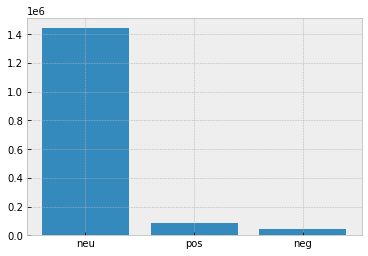

In [46]:
sentiment_barchart(df2['body'], method='Vader')

## Sentiment Analysis with Vader

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
analyser = SentimentIntensityAnalyzer()

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
# function to calculate polarity scores
pol = lambda x: analyser.polarity_scores(x)

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
clean_df = df2
clean_df.head()

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,author,created_utc,body,polarity_score
0,BobyCrypto,1546248072,start earning ln tips with good research and p...,0.483333
2,ishristov,1546247936,i dont think so wed need something else entire...,0.047619
3,thermobear,1546247892,ive seen multiple people call peterson a hack ...,0.266667
4,anonredditorrbitcoin,1546247713,i think so,0.000000
5,anonredditorrbitcoin,1546247692,its a techniqe closely related to btc for mixi...,0.300000


In [51]:
clean_df.shape

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1575318, 4)

In [52]:
# creating new column 'polarity' in clean_df
clean_df['polarity'] = clean_df['body'].apply(pol)

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
# checking that worked
clean_df.head()

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,author,created_utc,body,polarity_score,polarity
0,BobyCrypto,1546248072,start earning ln tips with good research and p...,0.483333,"{'neg': 0.067, 'neu': 0.697, 'pos': 0.236, 'co..."
2,ishristov,1546247936,i dont think so wed need something else entire...,0.047619,"{'neg': 0.0, 'neu': 0.736, 'pos': 0.264, 'comp..."
3,thermobear,1546247892,ive seen multiple people call peterson a hack ...,0.266667,"{'neg': 0.113, 'neu': 0.744, 'pos': 0.143, 'co..."
4,anonredditorrbitcoin,1546247713,i think so,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
5,anonredditorrbitcoin,1546247692,its a techniqe closely related to btc for mixi...,0.300000,"{'neg': 0.155, 'neu': 0.845, 'pos': 0.0, 'comp..."


In [54]:
# dropping unessential columns and seperating out 'polarity' dictionary
#df3 = pd.concat([clean_df.drop(['author_fullname'], axis=1), clean_df['polarity'].apply(pd.Series)], axis=1)
df3 = pd.concat([clean_df, clean_df['polarity'].apply(pd.Series)], axis=1)

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
df3.head()

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,author,created_utc,body,polarity_score,polarity,neg,neu,pos,compound
0,BobyCrypto,1546248072,start earning ln tips with good research and p...,0.483333,"{'neg': 0.067, 'neu': 0.697, 'pos': 0.236, 'co...",0.067,0.697,0.236,0.6187
2,ishristov,1546247936,i dont think so wed need something else entire...,0.047619,"{'neg': 0.0, 'neu': 0.736, 'pos': 0.264, 'comp...",0.000,0.736,0.264,0.9360
3,thermobear,1546247892,ive seen multiple people call peterson a hack ...,0.266667,"{'neg': 0.113, 'neu': 0.744, 'pos': 0.143, 'co...",0.113,0.744,0.143,0.2024
4,anonredditorrbitcoin,1546247713,i think so,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
5,anonredditorrbitcoin,1546247692,its a techniqe closely related to btc for mixi...,0.300000,"{'neg': 0.155, 'neu': 0.845, 'pos': 0.0, 'comp...",0.155,0.845,0.000,-0.5106


In [56]:
# new dataframe with average polarity score for each label
scores_df = pd.DataFrame()
scores_df['avg_positive'] = str(df3['pos'].mean())
scores_df['avg_neutral'] = str(df3['neu'].mean())
scores_df['avg_negative'] = str(df3['neg'].mean())
scores_df['avg_compound'] = str(df3['compound'].mean())

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
d = datetime.fromtimestamp(int(df3['created_utc'].iloc[0]))

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
str(d).split(' 00:00:00', 1)[0]

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'2018-12-31 02:21:12'

In [59]:
scores_df.head()

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,avg_positive,avg_neutral,avg_negative,avg_compound


In [60]:
# print average polarity score for each label
print('The average Positive score = ' + str(df3['pos'].mean()))
print('The average Neutral score = ' + str(df3['neu'].mean()))
print('The average Negative score = ' + str(df3['neg'].mean()))
print('The average Compound score = ' + str(df3['compound'].mean()))

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The average Positive score = 0.1273379952492324
The average Neutral score = 0.7953111067099449
The average Negative score = 0.07277716626102748
The average Compound score = 0.11317720460250079


In [61]:
# counting unique values
u = len(pd.unique(df2['author']))
  
print("Number of unique values :", u)

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of unique values : 66587


In [62]:
# Count unique calues in each column
print(df2['author'].value_counts())

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[deleted]           29160
cointastical        11516
dietrolldietroll     9748
Mark_Bear            8866
acered24             8086
                    ...  
besiinger               2
nabazz                  2
Luiskin69               2
dead--leaf              2
khydama                 2
Name: author, Length: 66587, dtype: int64


## Name Entity Recognition

https://stackoverflow.com/questions/66367475/oserror-e050-cant-find-model-en-core-web-sm-it-doesnt-seem-to-be-a-short

In [63]:
import spacy
from collections import  Counter
import seaborn as sns

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [64]:
def named_entity_barchart(text):
    nlp = spacy.load("en_core_web_sm")
    
    def _get_ner(text):
        doc=nlp(text)
        return [X.label_ for X in doc.ents]
    
    ent=text.apply(lambda x : _get_ner(x))
    ent=[x for sub in ent for x in sub]
    counter=Counter(ent)
    count=counter.most_common()
    
    x,y=map(list,zip(*count))
    sns.barplot(x=y,y=x)

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
named_entity_barchart(df2['body'])

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Frequency of Commonly Named Entities Barchart

In [ ]:
def most_common_named_entity_barchart(text, entity="PERSON"):
    nlp = spacy.load("en_core_web_sm")
    
    def _get_ner(text,ent):
        doc=nlp(text)
        return [X.text for X in doc.ents if X.label_ == ent]

    entity_filtered=text.apply(lambda x: _get_ner(x,entity))
    entity_filtered=[i for x in entity_filtered for i in x]
    
    counter=Counter(entity_filtered)
    x,y=map(list,zip(*counter.most_common(10)))
    sns.barplot(y,x).set_title(entity)

In [ ]:
most_common_named_entity_barchart(df2['body'], entity="ORG")

In [ ]:
most_common_named_entity_barchart(df2['body'], entity="CARDINAL")

In [ ]:
most_common_named_entity_barchart(df2['body'], entity="PERSON")

In [ ]:
most_common_named_entity_barchart(df2['body'], entity="GPE")

## Create new dataframe with average sentiment polarity scores for each day

In [ ]:
# Create dataframe to populate with polarity data
scores_df = pd.DataFrame(columns = ['time', 'avg_positive', 'avg_neutral', 'avg_negative', 'avg_compound'])

num = 0

for x in csv_list:

    try:

        # Read csv file to dataframe
        df = pd.read_csv(path + x)
    
        # Remove all rows that have NaN in df['body']
        df = df[df['body'].notna()]

        # Remove automoderator authors
        df = df[df.author != "AutoModerator"]
        
        # remove all comments from rBitcoinMod
        df = df[df.author != "rBitcoinMod"]
        
        # remove all comments with deleted in body
        df = df[df.body != "deleted"]
        
        # remove all comments with removed in body
        df = df[df.body != "removed"]
        
        # remove all comments with www.reddit.com in body
        df = df[df["body"].str.contains("www.reddit.com")==False]
        
        # Remove all characters except for alphabetical
        df['body'] = df['body'].replace('[^a-zA-Z ]', '', regex=True)
        
        # Convert body column to lowercase
        df['body'] = df['body'].str.lower()

        #bitcoin_df = df[df['body'].str.contains('Bitcoin|BTC', case=False)]
        bitcoin_df = df

        analyser = SentimentIntensityAnalyzer()

        # function to calculate polarity scores
        pol = lambda x: analyser.polarity_scores(x)

        # creating new column 'polarity' in clean_df
        bitcoin_df['polarity'] = bitcoin_df['body'].apply(pol)

        # Seperating out 'polarity' dictionary
        bitcoin_df = pd.concat([bitcoin_df, bitcoin_df['polarity'].apply(pd.Series)], axis=1)

        # Create datetime object from timestamp
        d = dt.datetime.fromtimestamp(int(bitcoin_df['created_utc'].iloc[0]))

        # Append new polarity scores to new row of dataframe
        scores_df.loc[num] = [str(d).split(' ', 1)[0], str(bitcoin_df['pos'].mean()), str(bitcoin_df['neu'].mean()), str(bitcoin_df['neg'].mean()),
                            str(bitcoin_df['compound'].mean())]

        num = int(num) + 1

    except:

        continue

        # Append new polarity scores to new row of dataframe
        scores_df.loc[num] = [np.nan, np.nan, np.nan, np.nan, np.nan]

        num = int(num) + 1


    # print average polarity score for each label
    #print('The Date = ' + str(d).split(' ', 1)[0])
    #print('The average Positive score = ' + str(bitcoin_df['pos'].mean()))
    #print('The average Neutral score = ' + str(bitcoin_df['neu'].mean()))
    #print('The average Negative score = ' + str(bitcoin_df['neg'].mean()))
    #print('The average Compound score = ' + str(bitcoin_df['compound'].mean()))

In [ ]:
scores_df.head()

In [ ]:
scores_df.shape

In [ ]:
scores_df.dtypes

In [ ]:
#scores_df.to_csv('../Data/Bitcoin_sentiment.csv')

In [ ]:
cleaning = scores_df

In [ ]:
cleaning.head()

## Clean Dataset

In [ ]:
cleaning = pd.read_csv('../Data/Bitcoin_sentiment.csv')
cleaning.head()

In [ ]:
cleaning.drop(cleaning.columns[[0]], axis=1, inplace=True)

In [ ]:
cleaning['time'] = pd.to_datetime(cleaning['time'])

In [ ]:
cleaning.dtypes

In [ ]:
cleaning.set_index('time', inplace=True)
cleaning.info()

In [ ]:
cleaning.resample('D').mean()

In [ ]:
cleaning.reset_index(inplace=True)

In [ ]:
cleaning.head()

## Plot ticker symbol price

In [ ]:
btc_df = pd.read_csv('../Data/Historical/BTC.csv')

In [ ]:
btc_df.head()

In [ ]:
btc_df.dtypes

In [ ]:
# Make time column a series with dtype datetime64[ns]
btc_df['time'] = pd.to_datetime(btc_df['time'])

In [ ]:
#greater than the start date and smaller than the end date
mask = (btc_df['time'] >= '2018-12-31T00:00') & (btc_df['time'] <= '2021-9-8T00:00')

In [ ]:
mask_df = btc_df.loc[mask]

In [ ]:
mask_df.head()

In [ ]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

fig = go.Figure(data=[go.Candlestick(x=mask_df['time'],
                open=mask_df['open'],
                high=mask_df['high'],
                low=mask_df['low'],
                close=mask_df['close'])])

fig.show()

## Merge Dataframes

In [ ]:
# Convert time column to datetime
cleaning['time'] = pd.to_datetime(cleaning['time'])

In [ ]:
df_merged = pd.merge(cleaning, mask_df, how='outer', on='time')

In [ ]:
df_merged.head()

In [ ]:
df_merged.dtypes

In [ ]:
#df_merged.to_csv('../Data/merged_sentiment.csv')

In [ ]:
test = df_merged

In [ ]:
# Create blank column in test dataframe
test['price_difference'] = ''

In [ ]:
num = 0
T = int(1)
R = int(0)

for index in test.iterrows():

    # Calculate difference between two columns
    n = test['close'].iloc[T] - test['close'].iloc[R]

    # if statement to assign 1 or 0 to new column depending on value of n
    if n >= 0:
        test['price_difference'].iloc[num] = 1
    else:
        test['price_difference'].iloc[num] = 0

    # Increase values by one for each iteration
    num = int(num) + 1
    T = int(T) + 1
    R = int(R) + 1

In [ ]:
test.head()

In [ ]:
test.to_csv('../Data/cleaned_sentiment_scores.csv')

## Correlation Analysis

In [ ]:
df_merged['avg_positive'] = df_merged['avg_positive'].astype(float, errors = 'raise')
df_merged['avg_neutral'] = df_merged['avg_neutral'].astype(float, errors = 'raise')
df_merged['avg_negative'] = df_merged['avg_negative'].astype(float, errors = 'raise')
df_merged['avg_compound'] = df_merged['avg_compound'].astype(float, errors = 'raise')

In [ ]:
df_merged['price_difference'] = df_merged['price_difference'].astype(int)

In [ ]:
df_merged.dtypes

In [ ]:
df_diff = df_merged.set_index('time').diff()
df_diff.head()

In [ ]:
df_time = df_merged['time']

In [ ]:
df_time.head()

In [ ]:
df_merged.drop('time', axis=1, inplace=True)

In [ ]:
df_merged.head()

In [ ]:
df_merged.corr()

In [ ]:
df_diff.corr()

## MinMaxScaler

In [ ]:
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler
 
scaler = MinMaxScaler()
 
crypto=pd.DataFrame(scaler.fit_transform(df_merged.values),
            columns=df_merged.columns, index=df_merged.index) 

print(crypto)

In [ ]:
crypto['time'] = df_time

In [ ]:
crypto.head()

In [ ]:
crypto.corr()

## Plot Heatmap

In [ ]:
#!pip install heatmapz

In [ ]:
from heatmap import heatmap, corrplot

In [ ]:
corr = crypto.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Seaborn Factorplot

In [ ]:
import seaborn as sns

melt_df = crypto.melt('time', var_name='cols',  value_name='vals')
g = sns.factorplot(x="time", y="vals", hue='cols', data=melt_df)